In [2]:
!pip install -q diffusers transformers accelerate safetensors


diffusers → contains Stable Diffusion pipeline

transformers → used for text encoder (CLIP)

accelerate → manages GPU efficiently

safetensors → faster & safer model loading

Without these, Stable Diffusion cannot run.

In [3]:
import torch    #PyTorch → deep learning framework , Handles:Tensors, GPU computation
from diffusers import StableDiffusionPipeline  #Imports pre-built pipeline , this contains: Text encoder (CLIP), U-Net (diffusion model), VAE (encoder + decoder)

model_id = "runwayml/stable-diffusion-v1-5" #model name hosted on Hugging Face  why? Lightweight, stable, works on free gpu

pipe = StableDiffusionPipeline.from_pretrained(  #Loading the Stable Diffusion pipeline, loads all above CLIP, U-NET,etc
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")  #Moving model to GPU, "cuda" = NVIDIA GPU - Moves all model weights to GPU & Enables fast image generation


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
#Stable Diffusion does not accept JSON prompts directly, but JSON can be used as a structured format that is converted into a natural language prompt before image generation.

**Because the model cannot read structured data — it reads natural language.**

Token indices sequence length is longer than the specified maximum sequence length for this model (358 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', a golden , warm brown , cream , and soft beige color palette , and shallow depth of field for a professional photography look ; set in an early morning urban indian apartment kitchen with anugrah ’ s pure a 2 gir cow ghee jar placed naturally on a wooden kitchen counter in the foreground alongside a small steel bowl of slightly melted golden ghee , and in the background a young indian couple aged 2 5 – 3 5 slightly out of focus cooking together , sharing a quiet smile with soft steam rising from hot food ; conveying an intimate , warm , loving mood with subtle smiles , comfortable silence , everyday romance , and storytelling that shows love through care rather than grand gestures ; include minimal , bo

  0%|          | 0/30 [00:00<?, ?it/s]

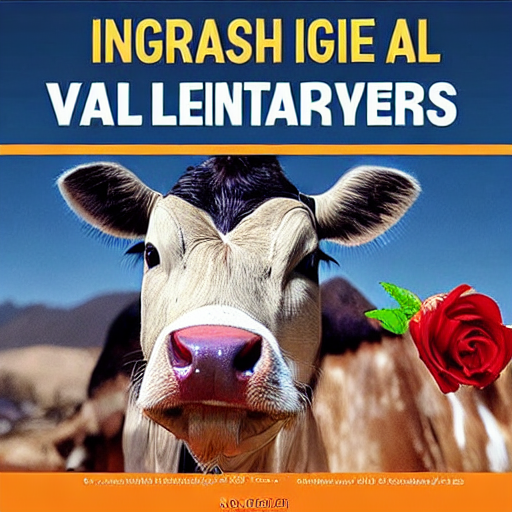

In [10]:
prompt = "Generate a high-quality, photorealistic cinematic advertisement image suitable for Instagram and Facebook feed ads for the brand “Anugrah’s Pure A2 Gir Cow Ghee” with a Valentine’s Day – Love in Everyday Moments campaign theme in a 1:1 aspect ratio, featuring a cinematic, premium, realistic visual style with warm morning sunlight, soft shadows, a golden, warm brown, cream, and soft beige color palette, and shallow depth of field for a professional photography look; set in an early morning urban Indian apartment kitchen with Anugrah’s Pure A2 Gir Cow Ghee jar placed naturally on a wooden kitchen counter in the foreground alongside a small steel bowl of slightly melted golden ghee, and in the background a young Indian couple aged 25–35 slightly out of focus cooking together, sharing a quiet smile with soft steam rising from hot food; conveying an intimate, warm, loving mood with subtle smiles, comfortable silence, everyday romance, and storytelling that shows love through care rather than grand gestures; include minimal, bold, clean text with the headline placed at the top center or top left reading “Iss Valentine, pyaar ko shuddhta ke saath manao”, the offer at the bottom right reading “Extra 5% OFF”, the coupon below reading “Use Code: LOVEA2” and “Till 15 Feb”, using a simple bold sans-serif font in white or warm ivory; ensure the brand logo appears only on the product packaging, the product remains the clear focus highlighting golden color, purity, and premium feel, no extra graphics are added, and the composition is safe for Meta ads with no excessive text, clear product visibility, and emotion-first storytelling."
#above is the converted text prompt from jason format
image = pipe(
    prompt,
    guidance_scale=7.5,
    num_inference_steps=30
).images[0]

image


  0%|          | 0/30 [00:00<?, ?it/s]

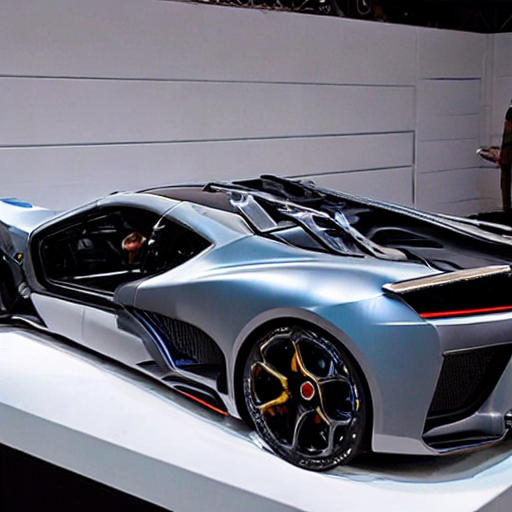

In [13]:
prompt="create a supercar"
#above is the simple text prompt
image = pipe(
    prompt,
    guidance_scale=7.5,
    num_inference_steps=30
).images[0]

image


Image generation (MOST IMPORTANT PART)

This single line does everything.

Step-by-step internally:

Random noise is created in latent space

Prompt → CLIP → text embedding

U-Net removes noise step-by-step

Guidance scale controls prompt strength

Final latent → decoded to image

Image returned